# 1. 基础操作1
注意，要先解压文件yellow_tripdata_2022-01.csv.zip

有些地方需要安装额外的包

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
# 创建表格
workout_dict = {
  "calories": [420, 380, 390, 390],
  "duration": [50, 40, 45, 45],
  "type": ['run', 'walk', 'walk', 'run']
}

workout = pd.DataFrame(workout_dict)
display(workout)
print(type(workout))

calories  duration  type
0       420        50   run
1       380        40  walk
2       390        45  walk
3       390        45   run

<class 'pandas.core.frame.DataFrame'>


In [3]:
workout.to_dict()

{'calories': {0: 420, 1: 380, 2: 390, 3: 390},
 'duration': {0: 50, 1: 40, 2: 45, 3: 45},
 'type': {0: 'run', 1: 'walk', 2: 'walk', 3: 'run'}}

In [4]:
workout.columns

Index(['calories', 'duration', 'type'], dtype='object')

In [5]:
workout.index

RangeIndex(start=0, stop=4, step=1)

In [6]:
workout.columns.tolist()

['calories', 'duration', 'type']

In [7]:
workout.index.tolist()

[0, 1, 2, 3]

In [8]:
workout = pd.DataFrame(workout_dict, 
                       index=['day1', 'day2', 'day3', 'day4'])
workout

calories  duration  type
day1       420        50   run
day2       380        40  walk
day3       390        45  walk
day4       390        45   run

In [9]:
# 对行列索引单独赋值
workout.index=["day1", "day2", "day3", "day4"]
workout.columns=["calories", "duration", "type"]
workout

calories  duration  type
day1       420        50   run
day2       380        40  walk
day3       390        45  walk
day4       390        45   run

## 1.1 选择表格(DataFrame)中的行或者列

In [10]:
# 选择一列
print(workout['calories'])
print(type(workout['calories']))

day1    420
day2    380
day3    390
day4    390
Name: calories, dtype: int64
<class 'pandas.core.series.Series'>


In [11]:
# 选择一列（保留列表格式）
workout[['calories']]

calories
day1       420
day2       380
day3       390
day4       390

In [12]:
# loc: 根据索引选取数据
workout.loc['day1', :]

calories    420
duration     50
type        run
Name: day1, dtype: object

In [13]:
# 保留DataFrame格式
workout.loc[['day1'], :]

calories  duration type
day1       420        50  run

In [14]:
# iloc: 根据位置选取数据，从0开始编号（类比: 访问list中的数据）
workout.iloc[0, :]

calories    420
duration     50
type        run
Name: day1, dtype: object

In [15]:
workout.iloc[[0], :]

calories  duration type
day1       420        50  run

In [16]:
# 访问表格左上角前两行前两列的数据
workout.iloc[0:2, 0:2]
# workout.iloc[[0,1], [0,1]]

calories  duration
day1       420        50
day2       380        40

In [17]:
# .at[]: 访问单独数据
workout.at['day1', 'calories']

420

In [18]:
# 改变单个数据的值
workout.at['day1', 'calories'] = 800
workout

calories  duration  type
day1       800        50   run
day2       380        40  walk
day3       390        45  walk
day4       390        45   run

# 2. 基础操作2

### 数据的输出/输入（真实例子）

In [19]:
titanic = pd.read_csv("data/titanic.csv")
# 常用参数: index_col: 索引行; sep: 分隔符; header;

In [20]:
# 打印表格的行数
print(len(titanic))
# 打印表格的形状(行数与列数)
print(titanic.shape)

891
(891, 12)


In [21]:
display(titanic.head())  # 打印数据前5行
display(titanic.tail(5)) # 打印数据最后5行
display(titanic.sample(5)) # 随机打印5行数据

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

PassengerId  Survived  Pclass                     Name     Sex   Age  \
458          459         1       2      Toomey, Miss. Ellen  female  50.0   
286          287         1       3  de Mulder, Mr. Theodore    male  30.0   
257          258         1       1     Cherry, Miss. Gladys  female  30.0   
278          279         0       3       Rice, Master. Eric    male   7.0   
20            21         0       2     Fynney, Mr. Joseph J    male  35.0   

     SibSp  Parch        Ticket    Fare Cabin Embarked  
458      0      0  F.C.C. 13531  10.500   NaN        S  
286      0      0        345774   9.500   NaN        S  
257      0      0        110152  86.500   B77        S  
278      4      1        382652  29.125   NaN        Q  
20       0      0        239865  26.000   NaN        S

In [22]:
# 返回表格中数字类型列的分布信息
titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [23]:
# 返回统计性信息(索引/每一列的信息/表格占用电脑内存的大小)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
# 返回每一列的数据类型信息
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [25]:
# 简化：删除一些列的方法

# 删除一列
del titanic['SibSp']
# 删除多个列
titanic = titanic.drop(columns=['Parch', 'Ticket', 'Fare'])
# titanic.drop(columns=['Parch', 'Ticket', 'Fare'], inplace=True)
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age Cabin  \
0                            Braund, Mr. Owen Harris    male  22.0   NaN   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   C85   
2                             Heikkinen, Miss. Laina  female  26.0   NaN   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0  C123   
4                           Allen, Mr. William Henry    male  35.0   NaN   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S

In [26]:
# 打印所有的年龄
titanic['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [27]:
# 性别属性
print(titanic['Sex'].unique())
# 打印所有的船舱等级
print(titanic['Pclass'].unique())
# 存活属性
print(titanic['Survived'].unique())

['male' 'female']
[3 1 2]
[0 1]


In [28]:
# # 使用for loop 查看每一列的独特值
# for col in titanic.columns:
#     print('列名：', col, titanic[col].unique())

### 集计Aggregation
任务：是否不同船舱的人员有不同的生存率

In [29]:
# 打印表格中的男女数量分布
titanic[['Sex', 'PassengerId']].groupby(['Sex']).count()

PassengerId
Sex                
female          314
male            577

In [30]:
# 针对多列进行信息集计
# 每个船舱等级乘客生存和死亡的概率
survive_by_class = titanic[['Pclass', 'Survived', 'PassengerId']].groupby(['Pclass', 'Survived']).count()
survive_by_class

PassengerId
Pclass Survived             
1      0                  80
       1                 136
2      0                  97
       1                  87
3      0                 372
       1                 119

In [31]:
survive_by_class = survive_by_class.reset_index()
survive_by_class = survive_by_class.rename(columns={"PassengerId": "count"})
survive_by_class

Pclass  Survived  count
0       1         0     80
1       1         1    136
2       2         0     97
3       2         1     87
4       3         0    372
5       3         1    119

<AxesSubplot:xlabel='Pclass', ylabel='count'>

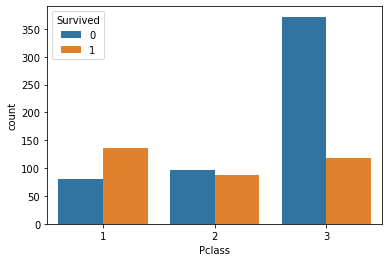

In [32]:
import seaborn as sns
plt.figure(facecolor='white')
sns.barplot(data=survive_by_class,
            x="Pclass",
            y="count", hue="Survived") # , "Pclass"

In [33]:
# set_index与reset_index互为逆运算
survive_by_class.set_index(['Pclass', 'Survived'])

count
Pclass Survived       
1      0            80
       1           136
2      0            97
       1            87
3      0           372
       1           119

In [34]:
titanic['Age'].isnull().sum()

177

In [35]:
filt = (~titanic['Age'].isnull())  # & | ~
titanic = titanic.loc[filt, :]
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age Cabin  \
0                            Braund, Mr. Owen Harris    male  22.0   NaN   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   C85   
2                             Heikkinen, Miss. Laina  female  26.0   NaN   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0  C123   
4                           Allen, Mr. William Henry    male  35.0   NaN   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S

In [36]:
# 年龄中位数
display(titanic[['Pclass', 'Survived', 'Age']].groupby(['Pclass', 'Survived']).median())

Age
Pclass Survived       
1      0         45.25
       1         35.00
2      0         30.50
       1         28.00
3      0         25.00
       1         22.00

### pd.Series vs. DataFrame vs. Index

In [37]:
# 使用agg完成很多统计量的计算
def percentile_25(x):
    return x.quantile(0.25)

def percentile_75(x):
    return x.quantile(0.75)

age_agg = titanic[['Pclass', 'Survived', 'Age']].groupby(['Pclass', 'Survived']).agg(
    ['min', 'max', 'median', 'mean', len, np.std, percentile_25, percentile_75])

age_agg

Age                                                        \
                   min   max median       mean  len        std percentile_25   
Pclass Survived                                                                
1      0          2.00  71.0  45.25  43.695312   64  15.284243         31.00   
       1          0.92  80.0  35.00  35.368197  122  13.760017         24.25   
2      0         16.00  70.0  30.50  33.544444   90  12.151581         25.00   
       1          0.67  62.0  28.00  25.901566   83  14.837787         17.50   
3      0          1.00  74.0  25.00  26.555556  270  12.334882         19.00   
       1          0.42  63.0  22.00  20.646118   85  11.995047         14.00   

                               
                percentile_75  
Pclass Survived                
1      0                55.25  
       1                45.00  
2      0                39.00  
       1                34.00  
3      0                33.00  
       1                29.00

In [38]:
print(age_agg.columns)

MultiIndex([('Age',           'min'),
            ('Age',           'max'),
            ('Age',        'median'),
            ('Age',          'mean'),
            ('Age',           'len'),
            ('Age',           'std'),
            ('Age', 'percentile_25'),
            ('Age', 'percentile_75')],
           )


In [39]:
print(age_agg.index)

MultiIndex([(1, 0),
            (1, 1),
            (2, 0),
            (2, 1),
            (3, 0),
            (3, 1)],
           names=['Pclass', 'Survived'])


In [41]:
# 方法1: 分级访问
age_med = age_agg.loc[:, 'Age']['median']
# 方法2: 一次性访问
# age_med = age_agg.loc[:, ('Age', 'median')]
age_med

Pclass  Survived
1       0           45.25
        1           35.00
2       0           30.50
        1           28.00
3       0           25.00
        1           22.00
Name: median, dtype: float64

In [42]:
print(age_med.name)
print(age_med.values)
print(age_med.index)

median
[45.25 35.   30.5  28.   25.   22.  ]
MultiIndex([(1, 0),
            (1, 1),
            (2, 0),
            (2, 1),
            (3, 0),
            (3, 1)],
           names=['Pclass', 'Survived'])


In [43]:
# 访问数据中的一行/一列，得到索引
# 一个表格本质上就是索引在行或列的方向落在一起形成的二维结构
one_row = titanic.iloc[0, :]
print(one_row.name)
print(one_row.values)
print(one_row.index)

0
[1 0 3 'Braund, Mr. Owen Harris' 'male' 22.0 nan 'S']
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Cabin',
       'Embarked'],
      dtype='object')


In [44]:
print(type(age_agg.loc[:, 'Age']['max']))

<class 'pandas.core.series.Series'>


# 工作流 0.1 字符串处理

In [45]:
# 推荐操作: 处理字符串前，将object类型转化为字符串类型
titanic['Name'] = titanic['Name'].astype("string")

In [46]:
# 字符内容全部改为小写
titanic['Name'].str.lower()[:3]

0                              braund, mr. owen harris
1    cumings, mrs. john bradley (florence briggs th...
2                               heikkinen, miss. laina
Name: Name, dtype: string

In [47]:
# 字符内容全部改为大写
titanic['Name'].str.upper()[:3]

0                              BRAUND, MR. OWEN HARRIS
1    CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
2                               HEIKKINEN, MISS. LAINA
Name: Name, dtype: string

In [48]:
# 得到字符的长度
titanic['Name'].str.len()[:3]

0    23
1    51
2    22
Name: Name, dtype: Int64

In [49]:
# strip(), lstrip(), rstrip(): 去除前后空格/左侧空格/右侧空格
# chaining: 一次串联使用多个函数
titanic['Name'].str.strip().str.lower().str.replace(" ", "_")[:3]

0                              braund,_mr._owen_harris
1    cumings,_mrs._john_bradley_(florence_briggs_th...
2                               heikkinen,_miss._laina
Name: Name, dtype: string

In [50]:
# split 分隔符分割字符串
titanic['lastName'] = titanic['Name'].str.split(',').str[0]
# titanic['Name'].str.split(',').str.get(0)[:5]
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age Cabin  \
0                            Braund, Mr. Owen Harris    male  22.0   NaN   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   C85   
2                             Heikkinen, Miss. Laina  female  26.0   NaN   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0  C123   
4                           Allen, Mr. William Henry    male  35.0   NaN   

  Embarked   lastName  
0        S     Braund  
1        C    Cumings  
2        S  Heikkinen  
3        S   Futrelle  
4        S      Allen

In [51]:
# optional指定字符串格式
titanic['Name'] = titanic['Name'].astype("string")

In [52]:
# 字符串可以简单拼接
titanic['nameSex'] = titanic['lastName'] + "_" + titanic['Sex']

#### 使用apply函数完成复杂操作

In [53]:
# 生成一条信息
def my_avg(x): # x是apply的series
    # 生成一条生平短信息
    # "Mr./Ms. 姓, survived/dead at titanic at age __"
    sex, lastname, survive_status, age = x['Sex'], x['lastName'], x['Survived'], x['Age']
    prefix, survive_str = "Mr. ", "died"
    
    if sex == "female":
        prefix = "Ms. "
    if survive_status == 1:
        survive_str = "survived"
    
    ret_string = "{} {}, {} at Titanic at the age of {}.".format(prefix, lastname, survive_str, age)
    return ret_string

titanic['message'] = titanic.apply(my_avg, axis=1)
display(titanic.head())

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age Cabin  \
0                            Braund, Mr. Owen Harris    male  22.0   NaN   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   C85   
2                             Heikkinen, Miss. Laina  female  26.0   NaN   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0  C123   
4                           Allen, Mr. William Henry    male  35.0   NaN   

  Embarked   lastName           nameSex  \
0        S     Braund       Braund_male   
1        C    Cumings    Cumings_female   
2        S  Heikkinen  Heikkinen_female   
3        S   Futrelle   Futrelle_female   
4        S      Allen        Allen_male   

                                             message  
0   Mr.  Braund, died at Titanic at the age of 22.0.  
1  Ms.  Cumings, survived at Titanic at the age o...  
2  Ms.  Heikkinen, survived at Titanic at the age...  
3  Ms.  Futrelle, survived at Titanic at the age ...  
4    Mr.  Allen, died at Titanic at the age of 35.0.

# 工作流0.2: 时间处理

In [54]:
# 读取纽约黄色出租车数据
taxi = pd.read_csv("data/yellow_tripdata_2022-01.csv")
taxi.head()

/opt/anaconda3/envs/manim/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         14.5    3.0      0.5        3.65           0.0   
1             1          8.0    0.5      0.5        4.00           0.0   
2             1          7.5    0.5      0.5        1.76           0.0   
3             2          8.0    0.5      0.5        0.00           0.0   
4             1         23.5    0.5      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  
0                    0.3         21.95                   2.5  
1                    0.3         13.30                   0.0  
2                    0.3         10.56                   0.0  
3                    0.3         11.80                   2.5  
4                    0.3         30.30                   2.5

In [55]:
# 只保留最重要的信息
taxi = taxi[['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'passenger_count', 'trip_distance', 'fare_amount',
             'PULocationID', 'DOLocationID']]
taxi.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  fare_amount  PULocationID  DOLocationID  
0           3.80         14.5           142           236  
1           2.10          8.0           236            42  
2           0.97          7.5           166           166  
3           1.09          8.0           114            68  
4           4.30         23.5            68           163

In [56]:
# Pandas的时间处理比较智能，一般可以不需要指定格式
time_start = pd.to_datetime("2022-01-01")
# time_start = pd.to_datetime("2021-01-01", format="%Y-%m-%d")
time_end = pd.to_datetime("2022-02-01")

time_start

Timestamp('2022-01-01 00:00:00')

In [57]:
# 简化列名
taxi = taxi.rename(columns={"tpep_pickup_datetime": "pickup_dt",
                            "tpep_dropoff_datetime": "dropoff_dt"})
taxi.head()

VendorID            pickup_dt           dropoff_dt  passenger_count  \
0         1  2022-01-01 00:35:40  2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43  2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21  2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21  2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48  2022-01-01 01:14:20              1.0   

   trip_distance  fare_amount  PULocationID  DOLocationID  
0           3.80         14.5           142           236  
1           2.10          8.0           236            42  
2           0.97          7.5           166           166  
3           1.09          8.0           114            68  
4           4.30         23.5            68           163

In [58]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   VendorID         int64  
 1   pickup_dt        object 
 2   dropoff_dt       object 
 3   passenger_count  float64
 4   trip_distance    float64
 5   fare_amount      float64
 6   PULocationID     int64  
 7   DOLocationID     int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 150.4+ MB


In [59]:
# 处理时间 (Pandas的时间处理比较智能)
taxi['pickup_dt'] = pd.to_datetime(taxi['pickup_dt'])
taxi['dropoff_dt'] = pd.to_datetime(taxi['dropoff_dt'])

In [60]:
# 使用dt函数返回时间信息
print(taxi['pickup_dt'].dt.year[:5].tolist())
print(taxi['pickup_dt'].dt.month[:5].tolist())
print(taxi['pickup_dt'].dt.day[:5].tolist())
print(taxi['pickup_dt'].dt.hour[:5].tolist())
print(taxi['pickup_dt'].dt.minute[:5].tolist())

[2022, 2022, 2022, 2022, 2022]
[1, 1, 1, 1, 1]
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
[35, 33, 53, 25, 36]


In [61]:
# 得到出行时间长度信息
taxi['duration'] = taxi['dropoff_dt'] - taxi['pickup_dt']
taxi['secs'] = taxi['duration'].dt.seconds
taxi['hour'] = taxi['secs'] / 60 / 60
taxi.head()

VendorID           pickup_dt          dropoff_dt  passenger_count  \
0         1 2022-01-01 00:35:40 2022-01-01 00:53:29              2.0   
1         1 2022-01-01 00:33:43 2022-01-01 00:42:07              1.0   
2         2 2022-01-01 00:53:21 2022-01-01 01:02:19              1.0   
3         2 2022-01-01 00:25:21 2022-01-01 00:35:23              1.0   
4         2 2022-01-01 00:36:48 2022-01-01 01:14:20              1.0   

   trip_distance  fare_amount  PULocationID  DOLocationID        duration  \
0           3.80         14.5           142           236 0 days 00:17:49   
1           2.10          8.0           236            42 0 days 00:08:24   
2           0.97          7.5           166           166 0 days 00:08:58   
3           1.09          8.0           114            68 0 days 00:10:02   
4           4.30         23.5            68           163 0 days 00:37:32   

   secs      hour  
0  1069  0.296944  
1   504  0.140000  
2   538  0.149444  
3   602  0.167222  
4  2252  0.625556

In [62]:
taxi.shape

(2463931, 11)

In [63]:
time_end - time_start

Timedelta('31 days 00:00:00')

In [64]:
pd.to_timedelta("3hour")

Timedelta('0 days 03:00:00')

In [65]:
# 信息的多条件筛选
filt1 = (taxi['pickup_dt'] >= time_start) & (taxi['pickup_dt'] < time_end)
filt2 = (taxi['dropoff_dt'] >= time_start) & (taxi['dropoff_dt'] < time_end)
filt3 = (taxi['duration'] <= pd.to_timedelta("3hour")) & \
        (taxi['duration'] >= pd.to_timedelta("1min"))
taxi = taxi.loc[filt1 & filt2 & filt3, :]

In [66]:
taxi.shape # 大约3万条数据被删除了

(2430636, 11)

In [67]:
taxi.describe()

VendorID  passenger_count  trip_distance   fare_amount  \
count  2.430636e+06     2.362167e+06   2.430636e+06  2.430636e+06   
mean   1.702077e+00     1.389820e+00   5.428360e+00  1.283937e+01   
std    4.813170e-01     9.834923e-01   5.516106e+02  2.575282e+02   
min    1.000000e+00     0.000000e+00   0.000000e+00 -3.350000e+02   
25%    1.000000e+00     1.000000e+00   1.070000e+00  6.500000e+00   
50%    2.000000e+00     1.000000e+00   1.760000e+00  9.000000e+00   
75%    2.000000e+00     1.000000e+00   3.160000e+00  1.350000e+01   
max    6.000000e+00     9.000000e+00   3.061593e+05  4.010923e+05   

       PULocationID  DOLocationID                   duration          secs  \
count  2.430636e+06  2.430636e+06                    2430636  2.430636e+06   
mean   1.660141e+02  1.635408e+02  0 days 00:12:54.461485800  7.744615e+02   
std    6.536002e+01  7.074040e+01  0 days 00:09:47.614351535  5.876144e+02   
min    1.000000e+00  1.000000e+00            0 days 00:01:00  6.000000e+01   
25%    1.320000e+02  1.130000e+02            0 days 00:06:27  3.870000e+02   
50%    1.620000e+02  1.620000e+02            0 days 00:10:17  6.170000e+02   
75%    2.340000e+02  2.360000e+02            0 days 00:16:14  9.740000e+02   
max    2.650000e+02  2.650000e+02            0 days 03:00:00  1.080000e+04   

               hour  
count  2.430636e+06  
mean   2.151282e-01  
std    1.632262e-01  
min    1.666667e-02  
25%    1.075000e-01  
50%    1.713889e-01  
75%    2.705556e-01  
max    3.000000e+00

<AxesSubplot:ylabel='Frequency'>

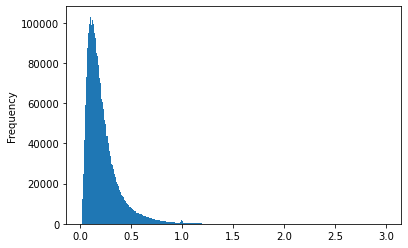

In [68]:
taxi["hour"].plot.hist(bins=300)

In [69]:
# 时间pd.dateTime + 时间差pd.timeDelta=新的时间pd.dateTime
# 更多参考：https://pandas.pydata.org/docs/user_guide/timeseries.html
print(time_start)
print(time_start + pd.to_timedelta("1day"))

2022-01-01 00:00:00
2022-01-02 00:00:00


In [70]:
taxi['pickup_dt'].dt.weekday.unique()

array([5, 6, 0, 1, 2, 3, 4])

In [71]:
# 添加一列区分周末与周中
isweekend = (taxi['pickup_dt'].dt.weekday >= 5)
taxi['isweekend'] = isweekend

# 工作流1: split-apply-combine

"divide and conquer" approach

### ref: https://pandas.pydata.org/docs/user_guide/groupby.html


    Splitting the data into groups based on some criteria.

    Applying a function to each group independently.

    Combining the results into a data structure.


apply:
- aggregation
- filtration
- transformation

In [72]:
taxi.head()

VendorID           pickup_dt          dropoff_dt  passenger_count  \
0         1 2022-01-01 00:35:40 2022-01-01 00:53:29              2.0   
1         1 2022-01-01 00:33:43 2022-01-01 00:42:07              1.0   
2         2 2022-01-01 00:53:21 2022-01-01 01:02:19              1.0   
3         2 2022-01-01 00:25:21 2022-01-01 00:35:23              1.0   
4         2 2022-01-01 00:36:48 2022-01-01 01:14:20              1.0   

   trip_distance  fare_amount  PULocationID  DOLocationID        duration  \
0           3.80         14.5           142           236 0 days 00:17:49   
1           2.10          8.0           236            42 0 days 00:08:24   
2           0.97          7.5           166           166 0 days 00:08:58   
3           1.09          8.0           114            68 0 days 00:10:02   
4           4.30         23.5            68           163 0 days 00:37:32   

   secs      hour  isweekend  
0  1069  0.296944       True  
1   504  0.140000       True  
2   538  0.149444       True  
3   602  0.167222       True  
4  2252  0.625556       True

In [73]:
len(taxi['PULocationID'].unique().tolist())

256

In [74]:
# 参考: https://pandas.pydata.org/docs/user_guide/groupby.html
# 任务1：统计从不同地方出发的出行平均时间长短
def mean_traveltime_mins(x):
    return x['secs'].mean() / 60

taxi.groupby(['PULocationID']).apply(mean_traveltime_mins)

PULocationID
1      10.879365
2      34.475000
3      29.866667
4      13.643877
5      75.948851
         ...    
261    15.893828
262    10.853247
263    10.399240
264    16.209319
265    56.866888
Length: 256, dtype: float64

In [75]:
# 如果一个地方的出行记录太少，则删除这个地区的记录
def gb_count_filt(df, min_trips):
    if len(df) <= min_trips:
        return False
    return True

taxi_bg = taxi.groupby(['PULocationID', 'isweekend'])
taxi_bg = taxi_bg.filter(gb_count_filt, min_trips=500)
print(taxi.shape)
print(taxi_bg.shape)

(2430636, 12)
(2405704, 12)


In [76]:
def mean_traveltime_df(df):
    return pd.Series({"mean_tt": df['secs'].mean() / 60,
                      "median_tt": df['secs'].median() / 60,
                      "count": len(df)})

time_summ = taxi_bg.groupby(['PULocationID', 'isweekend']).apply(mean_traveltime_df)
time_summ = time_summ.reset_index()
time_summ.head()

PULocationID  isweekend    mean_tt  median_tt   count
0             4      False  14.602386  12.816667  1376.0
1             4       True  12.655930  11.766667  1335.0
2             7      False  16.015696  12.766667  1116.0
3             7       True  13.951830  11.933333   583.0
4            13      False  15.369233  14.233333  7111.0

# 工作流2. Table sorting vs ranking

对于表格行的排序：
- sorting: 按照索引顺序排序（如：A-Z，0-100），表格行被改变
- ranking: 返回每一行的次序（如：成绩排名）
- ordering: 按照索引顺序（如：A-Z，0-100）返回原来为排序之前对应的位置

In [77]:
# 任务：找出平均出行时间最长/最短的出发地区（但是起码数据中有500次出行）
time_summ.sort_values("mean_tt")

PULocationID  isweekend    mean_tt  median_tt    count
115           237       True   9.085768   7.283333  24238.0
60            141       True   9.175517   7.500000  21642.0
130           263       True   9.371760   7.600000  19075.0
113           236       True   9.475746   7.666667  24116.0
54            137       True   9.580032   8.350000  10344.0
..            ...        ...        ...        ...      ...
25             70      False  24.004465  22.033333   6249.0
55            138      False  24.645293  22.766667  40577.0
52            132       True  30.492117  30.916667  33310.0
51            132      False  34.249740  33.216667  66814.0
133           265      False  58.503087  59.966667   2651.0

[134 rows x 5 columns]

In [78]:
# 降序排列
time_summ.sort_values("mean_tt", ascending=False)

PULocationID  isweekend    mean_tt  median_tt    count
133           265      False  58.503087  59.966667   2651.0
51            132      False  34.249740  33.216667  66814.0
52            132       True  30.492117  30.916667  33310.0
55            138      False  24.645293  22.766667  40577.0
25             70      False  24.004465  22.033333   6249.0
..            ...        ...        ...        ...      ...
54            137       True   9.580032   8.350000  10344.0
113           236       True   9.475746   7.666667  24116.0
130           263       True   9.371760   7.600000  19075.0
60            141       True   9.175517   7.500000  21642.0
115           237       True   9.085768   7.283333  24238.0

[134 rows x 5 columns]

In [79]:
# 打印每行数据的排名
time_summ['tt_rank'] = time_summ['mean_tt'].rank(ascending=False)
time_summ

PULocationID  isweekend    mean_tt  median_tt    count  tt_rank
0               4      False  14.602386  12.816667   1376.0     30.0
1               4       True  12.655930  11.766667   1335.0     50.0
2               7      False  16.015696  12.766667   1116.0     17.0
3               7       True  13.951830  11.933333    583.0     33.0
4              13      False  15.369233  14.233333   7111.0     22.0
..            ...        ...        ...        ...      ...      ...
129           263      False  10.858183   9.100000  42705.0    111.0
130           263       True   9.371760   7.600000  19075.0    132.0
131           264      False  16.583019  13.683333  14851.0     14.0
132           264       True  15.355895  13.283333   6503.0     23.0
133           265      False  58.503087  59.966667   2651.0      1.0

[134 rows x 6 columns]

In [80]:
time_summ = time_summ.sort_values(["mean_tt"], ascending=False)
time_summ

PULocationID  isweekend    mean_tt  median_tt    count  tt_rank
133           265      False  58.503087  59.966667   2651.0      1.0
51            132      False  34.249740  33.216667  66814.0      2.0
52            132       True  30.492117  30.916667  33310.0      3.0
55            138      False  24.645293  22.766667  40577.0      4.0
25             70      False  24.004465  22.033333   6249.0      5.0
..            ...        ...        ...        ...      ...      ...
54            137       True   9.580032   8.350000  10344.0    130.0
113           236       True   9.475746   7.666667  24116.0    131.0
130           263       True   9.371760   7.600000  19075.0    132.0
60            141       True   9.175517   7.500000  21642.0    133.0
115           237       True   9.085768   7.283333  24238.0    134.0

[134 rows x 6 columns]

In [81]:
# 恢复原来索引的顺序
time_summ.sort_index()

PULocationID  isweekend    mean_tt  median_tt    count  tt_rank
0               4      False  14.602386  12.816667   1376.0     30.0
1               4       True  12.655930  11.766667   1335.0     50.0
2               7      False  16.015696  12.766667   1116.0     17.0
3               7       True  13.951830  11.933333    583.0     33.0
4              13      False  15.369233  14.233333   7111.0     22.0
..            ...        ...        ...        ...      ...      ...
129           263      False  10.858183   9.100000  42705.0    111.0
130           263       True   9.371760   7.600000  19075.0    132.0
131           264      False  16.583019  13.683333  14851.0     14.0
132           264       True  15.355895  13.283333   6503.0     23.0
133           265      False  58.503087  59.966667   2651.0      1.0

[134 rows x 6 columns]

# 工作流3. data table concatenate, merging, joining, etc.

- concatenate: 表格纵向（或者横向）的拼接
- merging: 根据列的名字进行融合
- join: 根据index进行融合

### 参考资料: https://pandas.pydata.org/docs/user_guide/merging.html

任务：黄色出租车乘客在不同地点上车的平均出行里程

In [82]:
workout_dict2 = {
  "calories": [420, 380],
  "duration": [50, 40],
  "type": ['bike', 'bike']
}

workout2 = pd.DataFrame(workout_dict2, index=["day5", "day6"])
workout2

calories  duration  type
day5       420        50  bike
day6       380        40  bike

In [83]:
workout

calories  duration  type
day1       800        50   run
day2       380        40  walk
day3       390        45  walk
day4       390        45   run

In [84]:
# 使用concat完成表格纵向的拼接
pd.concat([workout, workout2], axis=0)

calories  duration  type
day1       800        50   run
day2       380        40  walk
day3       390        45  walk
day4       390        45   run
day5       420        50  bike
day6       380        40  bike

In [85]:
# https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page
taxi_lookup = pd.read_csv("data/taxi_zone_lookup.csv")
taxi_lookup = taxi_lookup.loc[taxi_lookup.LocationID <= 263]
print(taxi_lookup.shape)
taxi_lookup.head()

(263, 4)


LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone

In [86]:
import geopandas as gpd
taxi_geo = gpd.read_file("data/taxi_zones/taxi_zones.shp")
print(taxi_geo.shape)
taxi_geo.head()

(263, 7)


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.770 256767.698, 1026495.593 ...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.310 144283.336, 936046.565 14...

In [87]:
# 根据列名检查可以横向左右拼接两个表格
(taxi_lookup.LocationID != taxi_geo.OBJECTID).sum()

0

In [88]:
taxi_geo = pd.concat([taxi_geo, taxi_lookup], axis=1)
taxi_geo.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.770 256767.698, 1026495.593 ...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.310 144283.336, 936046.565 14...   

   LocationID        Borough                     Zone service_zone  
0           1            EWR           Newark Airport          EWR  
1           2         Queens              Jamaica Bay    Boro Zone  
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone  
3           4      Manhattan            Alphabet City  Yellow Zone  
4           5  Staten Island            Arden Heights    Boro Zone

### merge vs. join

In [89]:
# join two tables together
taxi_lookup = taxi_lookup.set_index("LocationID")
taxi_lookup.head()

Borough                     Zone service_zone
LocationID                                                     
1                     EWR           Newark Airport          EWR
2                  Queens              Jamaica Bay    Boro Zone
3                   Bronx  Allerton/Pelham Gardens    Boro Zone
4               Manhattan            Alphabet City  Yellow Zone
5           Staten Island            Arden Heights    Boro Zone

In [90]:
time_summ = time_summ.set_index("PULocationID")
time_summ.head()

isweekend    mean_tt  median_tt    count  tt_rank
PULocationID                                                   
265               False  58.503087  59.966667   2651.0      1.0
132               False  34.249740  33.216667  66814.0      2.0
132                True  30.492117  30.916667  33310.0      3.0
138               False  24.645293  22.766667  40577.0      4.0
70                False  24.004465  22.033333   6249.0      5.0

In [91]:
# join two DFs together by origin ID
time_summ_big2 = time_summ.join(taxi_lookup, how='left')
time_summ_big2 = time_summ_big2.reset_index()
time_summ_big2 = time_summ_big2.rename(columns={"index": "PULocationID"})
time_summ_big2.head()

PULocationID  isweekend    mean_tt  median_tt   count  tt_rank    Borough  \
0             4      False  14.602386  12.816667  1376.0     30.0  Manhattan   
1             4       True  12.655930  11.766667  1335.0     50.0  Manhattan   
2             7      False  16.015696  12.766667  1116.0     17.0     Queens   
3             7       True  13.951830  11.933333   583.0     33.0     Queens   
4            13      False  15.369233  14.233333  7111.0     22.0  Manhattan   

                Zone service_zone  
0      Alphabet City  Yellow Zone  
1      Alphabet City  Yellow Zone  
2            Astoria    Boro Zone  
3            Astoria    Boro Zone  
4  Battery Park City  Yellow Zone

merge

In [92]:
time_summ = time_summ.reset_index()

In [93]:
# merge two DFs together by destination ID
time_summ_big1 = time_summ.merge(taxi_geo, left_on="PULocationID", right_on="OBJECTID", how='left')
time_summ_big1.head()

PULocationID  isweekend    mean_tt  median_tt    count  tt_rank  OBJECTID  \
0           265      False  58.503087  59.966667   2651.0      1.0       NaN   
1           132      False  34.249740  33.216667  66814.0      2.0     132.0   
2           132       True  30.492117  30.916667  33310.0      3.0     132.0   
3           138      False  24.645293  22.766667  40577.0      4.0     138.0   
4            70      False  24.004465  22.033333   6249.0      5.0      70.0   

   Shape_Leng  Shape_Area               zone  LocationID borough  \
0         NaN         NaN                NaN         NaN     NaN   
1    0.245479    0.002038        JFK Airport       132.0  Queens   
2    0.245479    0.002038        JFK Airport       132.0  Queens   
3    0.107467    0.000537  LaGuardia Airport       138.0  Queens   
4    0.063840    0.000195      East Elmhurst        70.0  Queens   

                                            geometry  LocationID Borough  \
0                                               None         NaN     NaN   
1  MULTIPOLYGON (((1032791.001 181085.006, 103283...       132.0  Queens   
2  MULTIPOLYGON (((1032791.001 181085.006, 103283...       132.0  Queens   
3  MULTIPOLYGON (((1019904.219 225677.983, 102031...       138.0  Queens   
4  POLYGON ((1023276.361 216661.299, 1023320.055 ...        70.0  Queens   

                Zone service_zone  
0                NaN          NaN  
1        JFK Airport     Airports  
2        JFK Airport     Airports  
3  LaGuardia Airport     Airports  
4      East Elmhurst    Boro Zone

In [94]:
from matplotlib import cm
import matplotlib as mpl
import contextily as cx

In [95]:
time_summ_big1 = gpd.GeoDataFrame(time_summ_big1)
time_summ_big1 = time_summ_big1.to_crs(epsg=3857)
filt = (time_summ_big1.isweekend==True)
time_summ_big1_weekday = time_summ_big1.loc[filt, :]
time_summ_big1_weekend = time_summ_big1.loc[~filt, :]

In [96]:
mpl.rcParams['font.family'] = ['Heiti TC']
from mpl_toolkits.axes_grid1 import make_axes_locatable

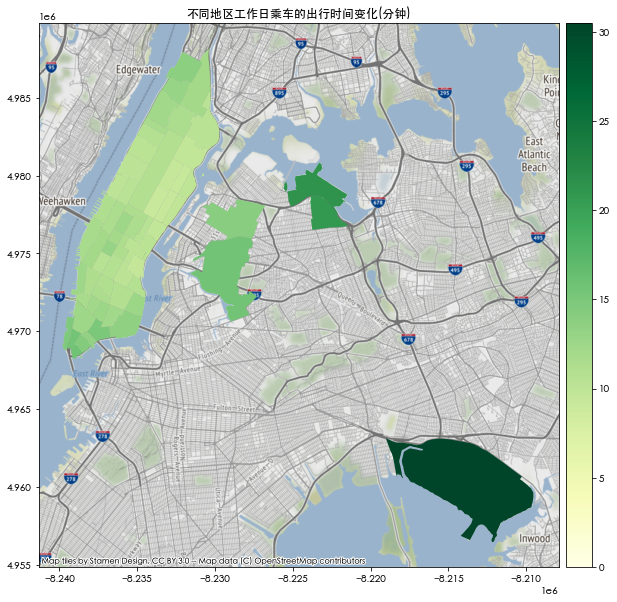

<Figure size 432x288 with 0 Axes>

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), facecolor=(1,1,1))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cmap = cm.get_cmap('YlGn')
norm = mpl.colors.Normalize(vmin=0, vmax=time_summ_big1_weekday['mean_tt'].max())
time_summ_big1_weekday.plot(column="mean_tt", ax=ax, cax=cax,
                            cmap=cmap, norm=norm, legend=True)
cx.add_basemap(ax)
ax.set_title(u"不同地区工作日乘车的出行时间变化(分钟)")
plt.figure(facecolor='white')
plt.show()

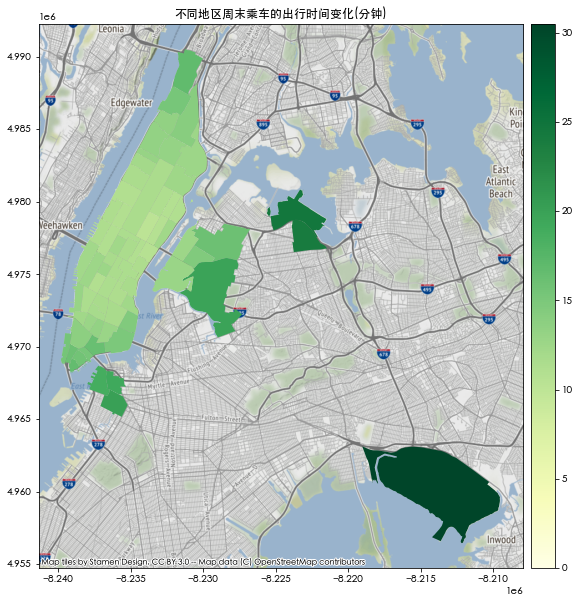

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), facecolor=(1,1,1))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cmap = cm.get_cmap('YlGn')
norm = mpl.colors.Normalize(vmin=0, vmax=time_summ_big1_weekday['mean_tt'].max())
time_summ_big1_weekend.plot(column="mean_tt", ax=ax, cax=cax,
                            cmap=cmap, norm=norm, legend=True)
cx.add_basemap(ax)
ax.set_title(u"不同地区周末乘车的出行时间变化(分钟)")
# plt.figure(facecolor='yellow')
plt.show()

出租车颜色：https://www.citysignal.com/whats-the-difference-between-green-cabs-yellow-cabs-other-taxis-in-nyc/

黄色主要在曼哈顿运营；绿色在曼哈顿周边运营

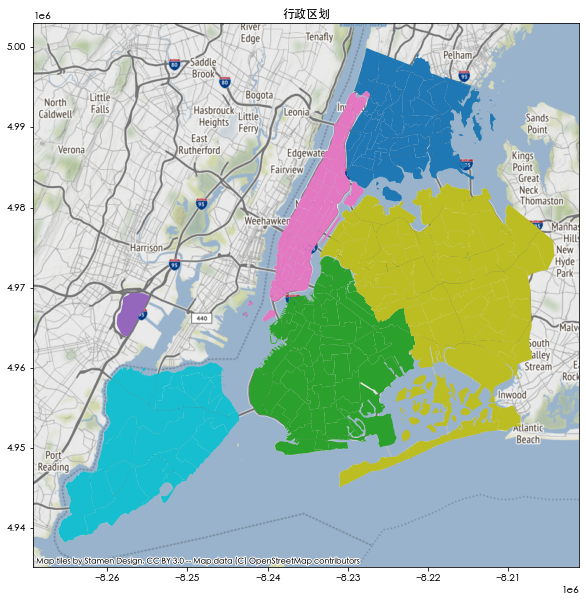

In [99]:
taxi_geo = taxi_geo.to_crs(epsg=3857)
# 任务：打印行政区
fig, ax = plt.subplots(1, 1, figsize=(10, 10), facecolor=(1,1,1))
taxi_geo.plot(column="borough", ax=ax)
cx.add_basemap(ax)
ax.set_title(u"行政区划")
plt.show()

In [100]:
time_summ_big1.head()

PULocationID  isweekend    mean_tt  median_tt    count  tt_rank  OBJECTID  \
0           265      False  58.503087  59.966667   2651.0      1.0       NaN   
1           132      False  34.249740  33.216667  66814.0      2.0     132.0   
2           132       True  30.492117  30.916667  33310.0      3.0     132.0   
3           138      False  24.645293  22.766667  40577.0      4.0     138.0   
4            70      False  24.004465  22.033333   6249.0      5.0      70.0   

   Shape_Leng  Shape_Area               zone  LocationID borough  \
0         NaN         NaN                NaN         NaN     NaN   
1    0.245479    0.002038        JFK Airport       132.0  Queens   
2    0.245479    0.002038        JFK Airport       132.0  Queens   
3    0.107467    0.000537  LaGuardia Airport       138.0  Queens   
4    0.063840    0.000195      East Elmhurst        70.0  Queens   

                                            geometry  LocationID Borough  \
0                                               None         NaN     NaN   
1  MULTIPOLYGON (((-8218165.291 4962845.637, -821...       132.0  Queens   
2  MULTIPOLYGON (((-8218165.291 4962845.637, -821...       132.0  Queens   
3  MULTIPOLYGON (((-8223309.773 4980833.287, -822...       138.0  Queens   
4  POLYGON ((-8221960.050 4977193.265, -8221942.5...        70.0  Queens   

                Zone service_zone  
0                NaN          NaN  
1        JFK Airport     Airports  
2        JFK Airport     Airports  
3  LaGuardia Airport     Airports  
4      East Elmhurst    Boro Zone

# 工作流 4: wide to long, long to wide, etc.

In [101]:
time_summ_wide = time_summ_big1.pivot(index="PULocationID", columns='isweekend', values='mean_tt')
time_summ_wide

isweekend         False       True
PULocationID                      
4             14.602386  12.655930
7             16.015696  13.951830
13            15.369233  14.820625
24            13.038596  11.760723
25            20.031388        NaN
...                 ...        ...
261           16.073646  15.555334
262           11.126642   9.920745
263           10.858183   9.371760
264           16.583019  15.355895
265           58.503087        NaN

[71 rows x 2 columns]

In [104]:
print(time_summ_big1.shape)
print(time_summ_wide.shape)

(134, 17)
(71, 2)


wide to long

In [105]:
time_summ_wide.columns = ['mean_tt_wd', 'mean_tt_we']
time_summ_wide = time_summ_wide.reset_index()
time_summ_wide.columns = ['PULocationID', 'mean_tt0', 'mean_tt1']
time_summ_wide

PULocationID   mean_tt0   mean_tt1
0              4  14.602386  12.655930
1              7  16.015696  13.951830
2             13  15.369233  14.820625
3             24  13.038596  11.760723
4             25  20.031388        NaN
..           ...        ...        ...
66           261  16.073646  15.555334
67           262  11.126642   9.920745
68           263  10.858183   9.371760
69           264  16.583019  15.355895
70           265  58.503087        NaN

[71 rows x 3 columns]

In [106]:
# wide to long
time_summ_long = pd.wide_to_long(time_summ_wide, stubnames="mean_tt", i="PULocationID", j="weekend")
time_summ_long = time_summ_long.reset_index()
time_summ_long

PULocationID  weekend    mean_tt
0               4        0  14.602386
1               7        0  16.015696
2              13        0  15.369233
3              24        0  13.038596
4              25        0  20.031388
..            ...      ...        ...
137           261        1  15.555334
138           262        1   9.920745
139           263        1   9.371760
140           264        1  15.355895
141           265        1        NaN

[142 rows x 3 columns]

# 注意事项
1. 缺失值的处理
- 替换为0 (fill with 0)
- 替换为均值/中位数值 (fill with mean/median)
- 直接删除对应纪律 (delete the records with NAs)
- 根据其他列差值 (interpolate)
- 根据其他列均值回归 (linear regression)

2. 区分copy（拷贝的数据）与view（数据的索引）的区别
- SettingWithCopyWarning警告: 确认自己是否要改变最开始的表格的值
- 有时可以使用.copy()直接进行拷贝

3. Pandas的不足
- 数据全部在内存之中(一般个人电脑设备的内存限制在8GB-64GB)
- 单个核心运行
- 在大数据/云计算/多核计算中，可以使用Spark/PySpark等工具进行运算

In [107]:
workout

calories  duration  type
day1       800        50   run
day2       380        40  walk
day3       390        45  walk
day4       390        45   run

In [108]:
workout_sub1 = workout.loc[["day1"], :]
workout_sub1['calories'] = 1700
display(workout_sub1)
display(workout)

calories  duration type
day1      1700        50  run

calories  duration  type
day1       800        50   run
day2       380        40  walk
day3       390        45  walk
day4       390        45   run

In [109]:
workout_sub2 = workout.loc["day1", :]
workout_sub2['calories'] = 2700
display(workout_sub2)
display(workout)

/opt/anaconda3/envs/manim/lib/python3.7/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


calories    2700
duration      50
type         run
Name: day1, dtype: object

calories  duration  type
day1       800        50   run
day2       380        40  walk
day3       390        45  walk
day4       390        45   run

In [110]:
# 等价于: workout_sub2['calories'] = 2700
workout.loc["day1"]["calories"] = 2700
workout

/opt/anaconda3/envs/manim/lib/python3.7/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


calories  duration  type
day1       800        50   run
day2       380        40  walk
day3       390        45  walk
day4       390        45   run

In [111]:
# 正确的方法
workout.at["day1", "calories"] = 2700 #.at赋值单个数据效率更高一点
workout

calories  duration  type
day1      2700        50   run
day2       380        40  walk
day3       390        45  walk
day4       390        45   run

In [112]:
# 使用.copy()复制DataFrame
workout_copy = workout.copy()
workout_copy.at["day1", "calories"] = 12345
workout # 原始DataFrame没有变化

calories  duration  type
day1      2700        50   run
day2       380        40  walk
day3       390        45  walk
day4       390        45   run

Done 完